## Lab 3: Isomap
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

### Notes
- You can use the ```sklearn.neighbors.NearestNeighbors``` class.
- You are expected to write your own implementation of the Floyd-Warshall algorithm, as seen in class.
    - If you wish, you can implement Dijkstra's algorithm instead.
- Remember that your distance matrix must be symmetric!
- Test your algorithm with $n=100$ points at first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

np.random.seed(123)

# Exercise 1
- Write your own implementation of Isomap. 
- Apply it to the Swiss Roll dataset ($n=1000$) from Lab 1. 

In [2]:
def swiss_roll(n): #from lab 1 +  labels added
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate

    color = data[:,0]**2 + data[:,1]**2

    return data, color

In [3]:
from sklearn.manifold import Isomap

In [4]:
embedding = Isomap(n_components=2, path_method='FW') #n_neighbors=5 (default)

In [5]:
X, y = swiss_roll(1000)

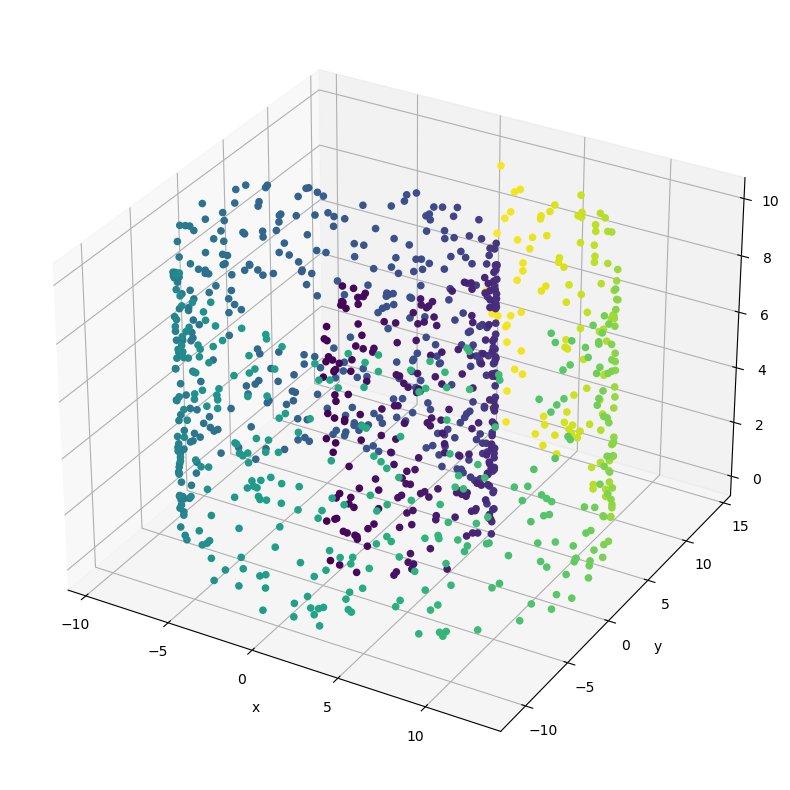

In [6]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
axes.scatter3D(X[:,0], X[:,1], X[:,2],c=y, alpha = 1)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

#axes.view_init(90,0) #(elevation, azimuth angle)

plt.show()

In [7]:
X_new = embedding.fit_transform(X)

In [8]:
X_new.shape

(1000, 2)

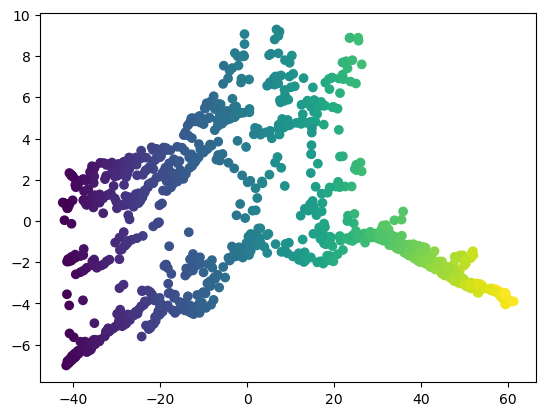

In [9]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)
plt.show()

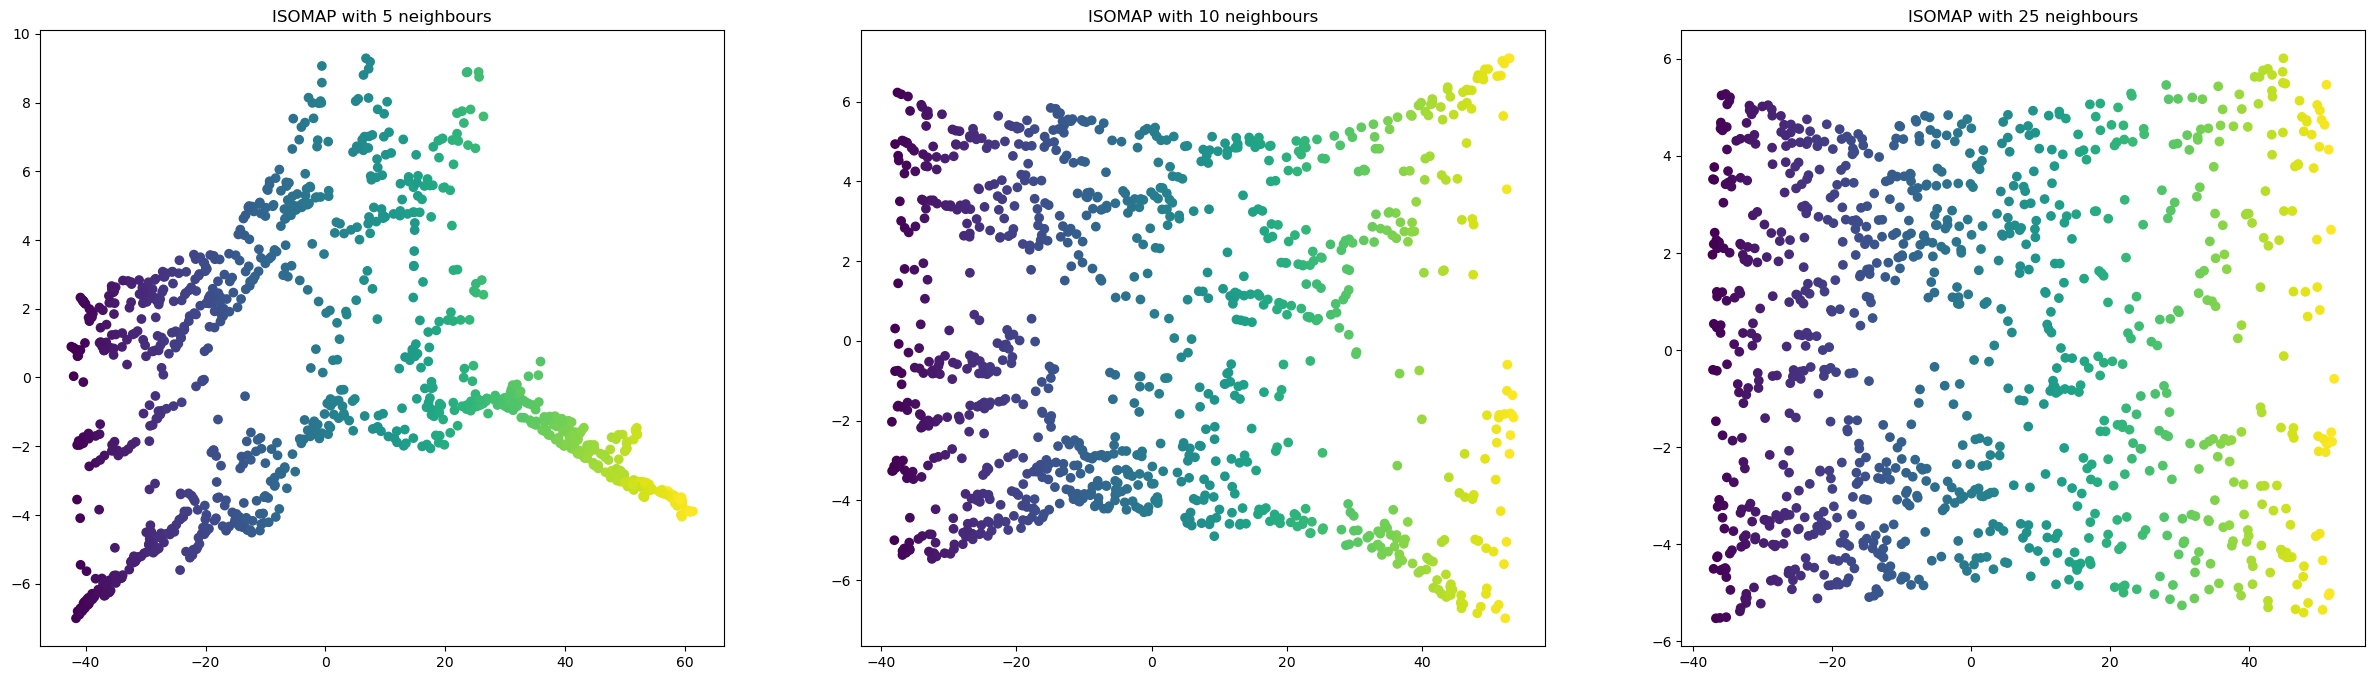

In [10]:
fig, ax = plt.subplots(1,3, figsize = (30,8))
for idx, n_neigh in enumerate([5, 10, 25]):
    embedding = Isomap(n_components=2, path_method='FW', n_neighbors=n_neigh) 
    X_new = embedding.fit_transform(X)
    ax[idx].scatter(X_new[:,0], X_new[:,1], c=y)
    ax[idx].set_title(f"ISOMAP with {n_neigh} neighbours")
plt.show()


#how to choose k?
#rule of thumb: select it as the smallest k that guarantees a fully-connected graph
#if it is set too large, you will have shortcuts

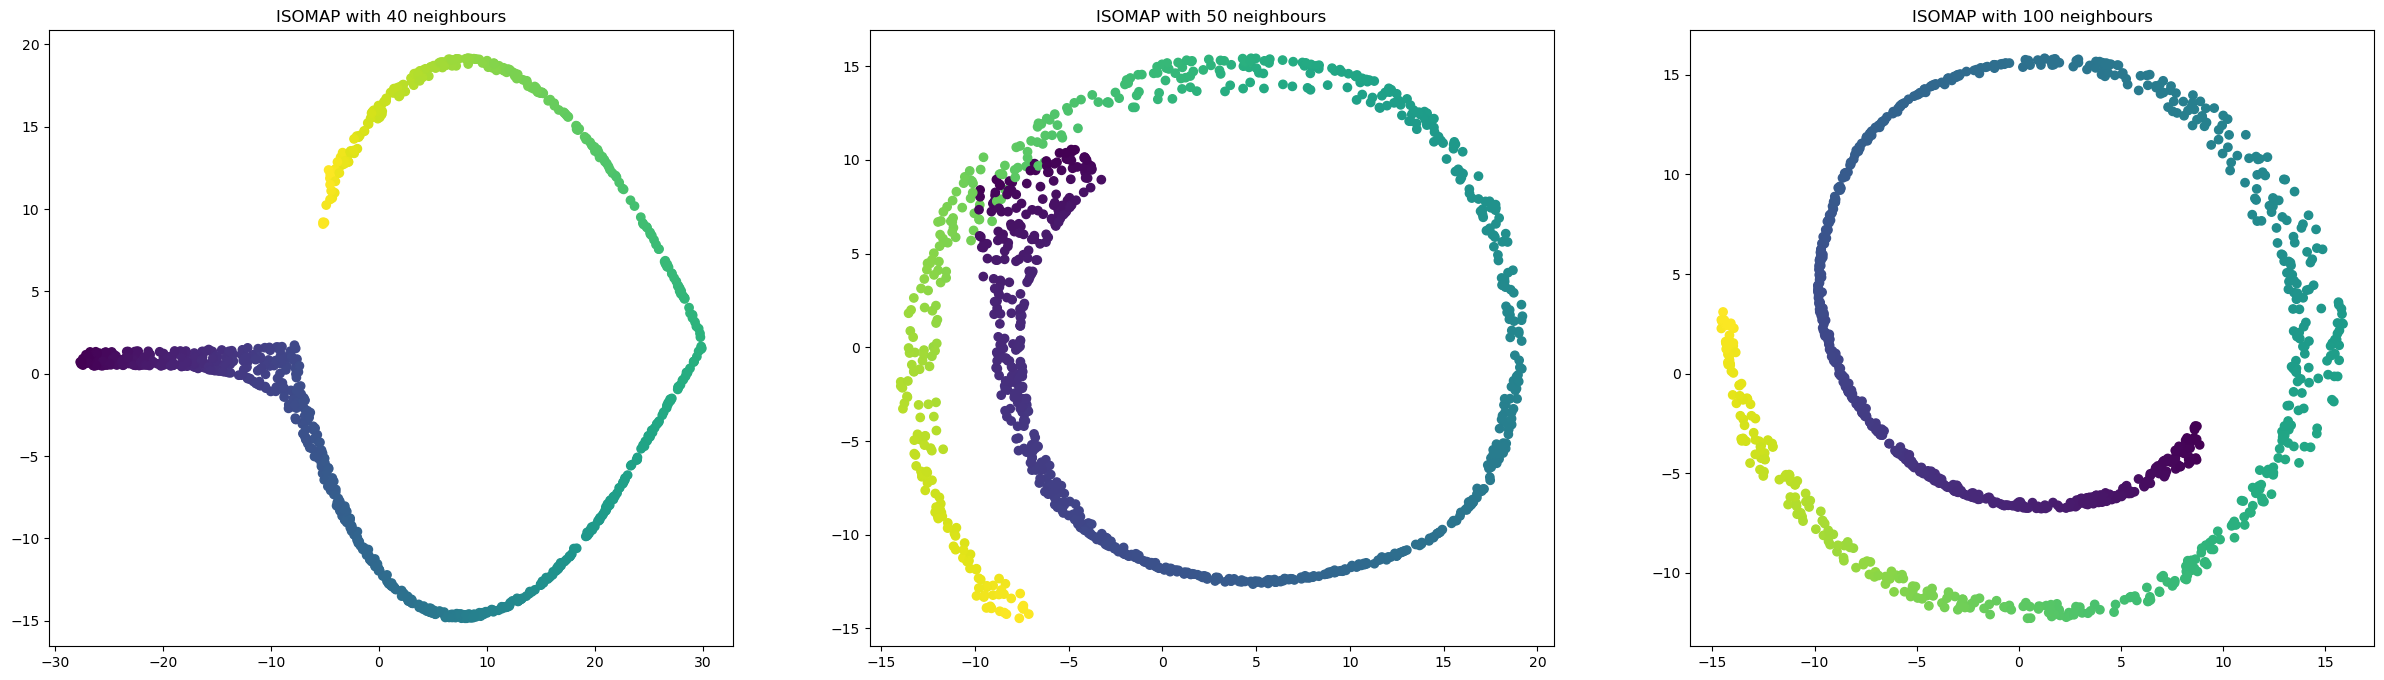

In [11]:
fig, ax = plt.subplots(1,3, figsize = (30,8))
for idx, n_neigh in enumerate([40, 50, 100]):
    embedding = Isomap(n_components=2, path_method='FW', n_neighbors=n_neigh) 
    X_new = embedding.fit_transform(X)
    ax[idx].scatter(X_new[:,0], X_new[:,1], c=y)
    ax[idx].set_title(f"ISOMAP with {n_neigh} neighbours")
plt.show()

If we test it with a larger number of datapoints (say $n=5000$) we can see that the algorithm works much better. 
The Swiss Roll is denser and the Isomap projection is more clearly able to unfold the manifold. With the ```sklearn``` implementation it takes roughly 30 seconds, it may be that your version is slower. 

In [12]:
embedding = Isomap(n_components=2, path_method='FW') 

In [13]:
X,y = swiss_roll(5000)

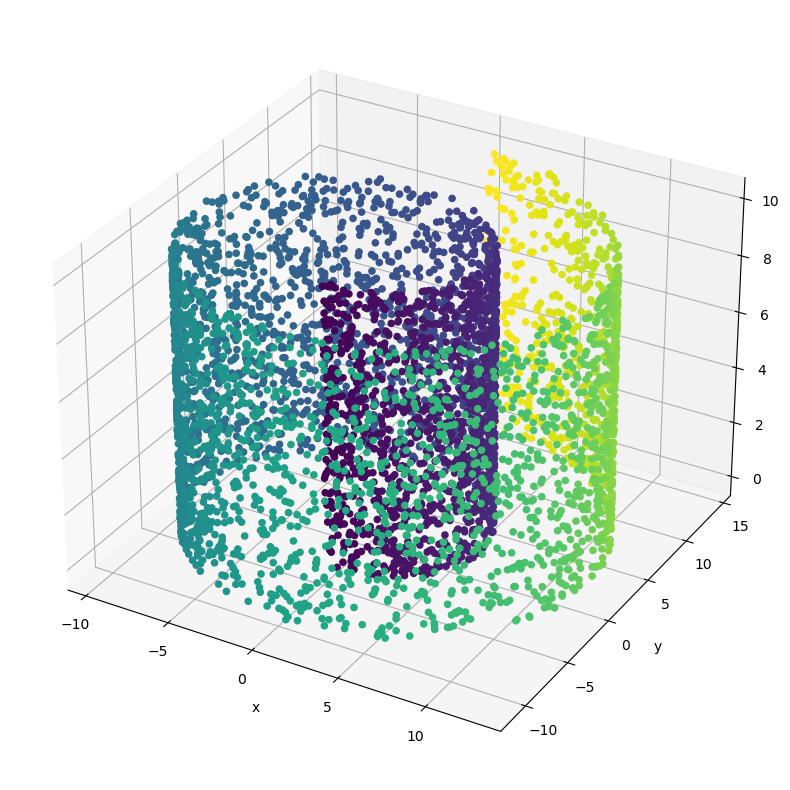

In [14]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
axes.scatter3D(X[:,0], X[:,1], X[:,2],c=y, alpha = 1) 

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

#axes.view_init(45, 45) #(elevation, azimuth angle)

plt.show()

In [15]:
X_new = embedding.fit_transform(X)

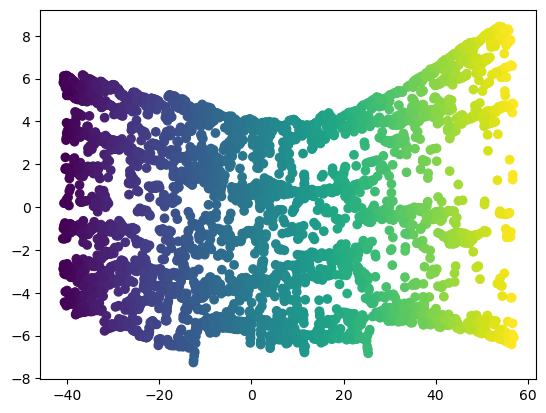

In [16]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)
plt.show()

- Use a modified version of the Swiss Roll dataset, in which Gaussian noise from a Normal $N(\mu=0, \sigma=0.5)$ is added to the $x$ and $y$ coordinates. Apply Isomap to this dataset and discuss the differences with the previous point.

In [17]:
def swiss_roll_noisy(n):
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi) + np.random.normal(0,0.5,n) #x coordinte
    data[:,1]=phi*np.sin(phi) + np.random.normal(0,0.5,n) #y coordinate
    data[:,2]=psi #z coordinate

    color = data[:,0]**2 + data[:,1]**2
    return data, color

In [18]:
X,y = swiss_roll_noisy(1000)

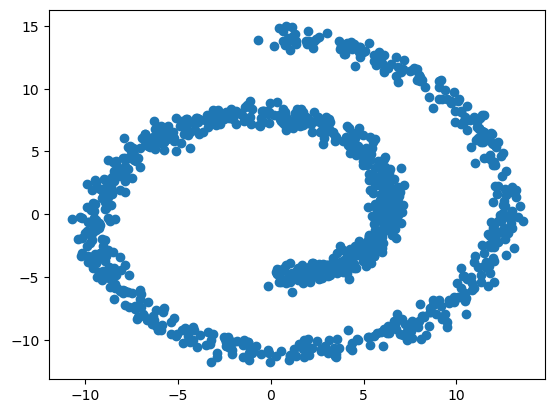

In [19]:
plt.scatter(X[:,0], X[:,1])
plt.show()

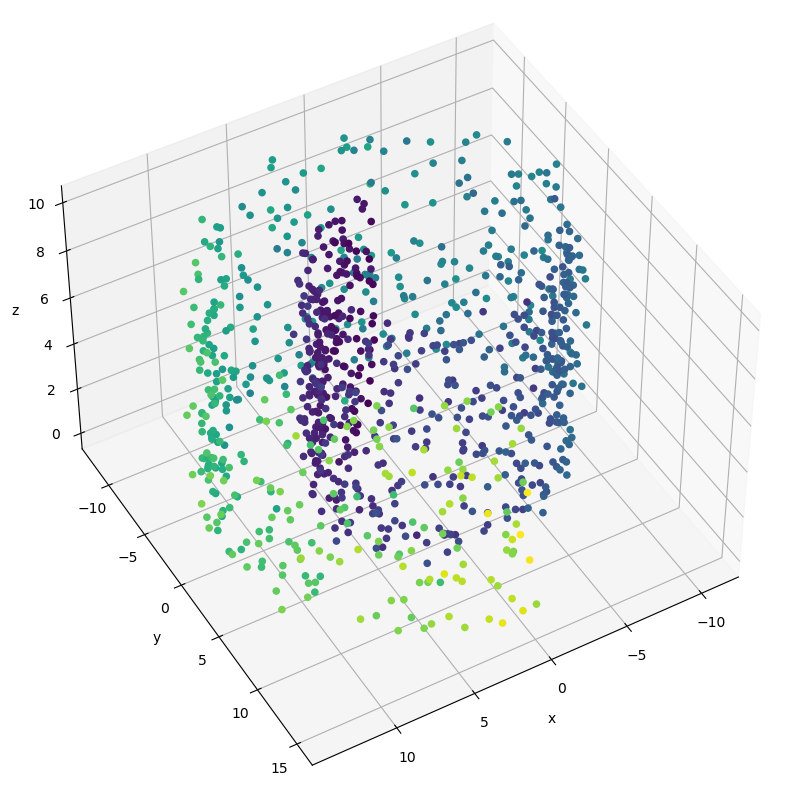

In [20]:
plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
axes.scatter3D(X[:,0], X[:,1], X[:,2], c=y, alpha=1)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

axes.view_init(45, 60) #(elevation, azimuth angle)

plt.show()

In [21]:
embedding = Isomap(n_components=2,path_method='FW')

In [22]:
X_new = embedding.fit_transform(X)

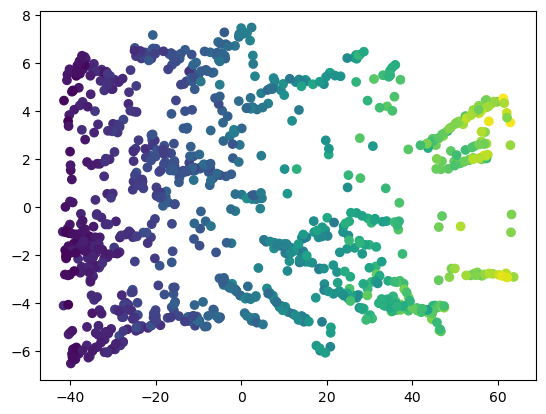

In [23]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)
plt.show()

# Exercise 2
Undersample randomly from the  ```Dry_Bean_Dataset.xlsx``` in order to have $n=1000$ datapoints. Follow the same pipeline of Exercise 1 of the previous lab by replacing PCA with Isomap. Discuss the differences with particular focus on the accuracy of the logistic regression.

In [24]:
df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")

In [25]:
y = df['Class']
X = df.drop('Class', axis=1)

In [26]:
encoder = OrdinalEncoder()
y=np.array(y)
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))
print(y)  

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [27]:
X.shape

(13611, 16)

In [28]:
X, _, y , _ = train_test_split(X, y, train_size =1000, random_state=31)

In [29]:
X.shape

(1000, 16)

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=31)

In [31]:
X_mean = Xtrain.mean()
X_std = Xtrain.std()

In [32]:
Xtrain = (Xtrain-X_mean )/X_std

In [33]:
isomap = Isomap(n_components=16, path_method='FW', n_neighbors=10)

In [34]:
X_new = isomap.fit_transform(Xtrain)

In [35]:
Xtest = (Xtest- Xtest.mean())/Xtest.std()

In [36]:
score = []
for i in range(X.shape[1]):
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr.fit(X_new[:,:i+1], ytrain.ravel())

    x_PC = isomap.transform(Xtest)
    x_PC = x_PC[:,:i+1]
    
    yhat = lr.predict(x_PC)
    print(lr.score(x_PC, ytest.ravel()))
    score.append(lr.score(x_PC, ytest.ravel()))

0.73
0.84
0.88
0.875
0.88
0.915
0.915
0.905
0.91
0.905
0.905
0.905
0.905
0.91
0.905
0.91


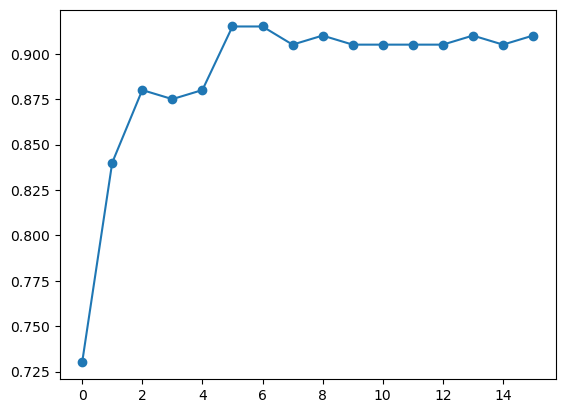

In [37]:
plt.plot(score, 'o-')
plt.show()

In [38]:
print(f"The maximum values of the accuracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

The maximum values of the accuracy score is reached with 5 PCs and it is equal to 0.915
